![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

The goal is to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  The task at hand is to solve the clustering problem by helping them identify groups in the dataset!

**The First step is to import packages**

In [25]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

**We load and examine the dataset** 

In [26]:
# Loading the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [27]:
# Check for missing values in dataset
print(penguins_df.isna().sum())

# Check datatypes
print(penguins_df.info())

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB
None


We can see from the above result that there are no missing values, so we proceed to preprocess our data

**Preprocessing**

In [28]:
# Create dummy varaiables for the categorical variable
penguins_dummies = pd.get_dummies(penguins_df['sex'], drop_first=False)
print(penguins_dummies.head())

   FEMALE   MALE
0   False   True
1    True  False
2    True  False
3    True  False
4   False   True


In [29]:
# Concatenate DataFrames and Display the First Few Rows
penguins_dummies = pd.concat([penguins_df, penguins_dummies], axis=1)
print(penguins_dummies.head())

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex  \
0              39.1             18.7              181.0       3750.0    MALE   
1              39.5             17.4              186.0       3800.0  FEMALE   
2              40.3             18.0              195.0       3250.0  FEMALE   
3              36.7             19.3              193.0       3450.0  FEMALE   
4              39.3             20.6              190.0       3650.0    MALE   

   FEMALE   MALE  
0   False   True  
1    True  False  
2    True  False  
3    True  False  
4   False   True  


In [30]:
# Drop original categorical column
penguins_dummies = penguins_dummies.drop("sex", axis=1)

# Convert specific dummy-encoded columns to integers
dummy_columns = ['FEMALE', 'MALE']
penguins_dummies[dummy_columns] = penguins_dummies[dummy_columns].astype(int)

# Change all column names to lowercase
penguins_dummies.columns = penguins_dummies.columns.str.lower()

In [32]:
# View first five rows of dataset
penguins_dummies.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,female,male
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,36.7,19.3,193.0,3450.0,1,0
4,39.3,20.6,190.0,3650.0,0,1


**Next we scale the dataset for uniformity**

In [33]:
# Scale the dataset
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins_dummies)

**Perform Elbow analysis to determine the optimal number of clusters**

In [39]:
import warnings

# Suppress specific warning related to KMeans memory leak
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

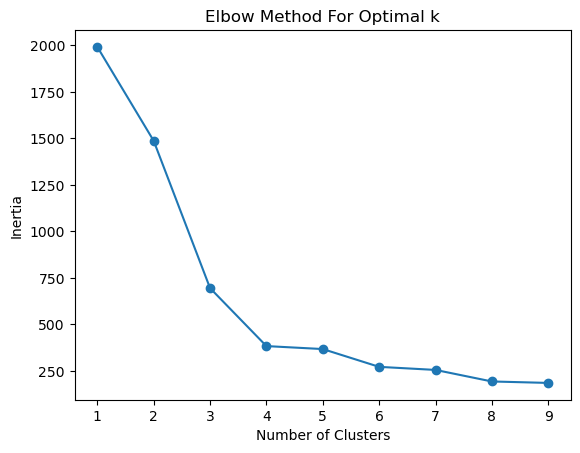

In [40]:
# Create an empty list to store the inertia for a range of KMeans models
# with varying numbers of clusters
inertia_values = []

# Perform Elbow analysis using a for loop
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(penguins_scaled)
    inertia_values.append(kmeans.inertia_)
    
# Visualize the list of inertia values
plt.plot(range(1, 10), inertia_values, marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

Inertia is a measure of how well the data points are grouped within a cluster. It is calculated as the sum of squared distances from each data point to the center (centroid) of its assigned cluster. The lower the inertia, the better the clustering.

The Elbow Method helps figure out the best number of clusters by finding where the inertia reduction slows down as we increase the number of clusters.

We can see from the graph above that the inertia slows drastically at cluster 4.

**Run the K-means clustering algorithm**

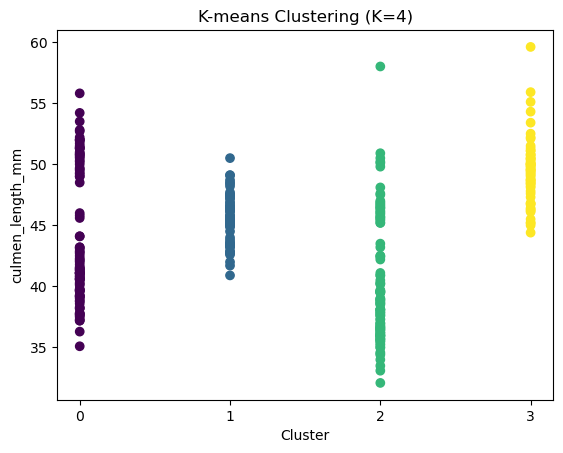

In [41]:
# with the optimal number of clusters 
n_clusters = 4

# Ensure all column names are strings
# Assuming penguins_scaled is a DataFrame, if it's an ndarray, this step is not needed
if isinstance(penguins_scaled, pd.DataFrame):
    penguins_scaled.columns = penguins_scaled.columns.astype(str)

kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_scaled)
penguins_df['label'] = kmeans.labels_

# and visualize the clusters (here for the 'culmen_length_mm' column)
plt.scatter(penguins_df['label'], penguins_df['culmen_length_mm'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Cluster')
plt.ylabel('culmen_length_mm')
plt.xticks(range(int(penguins_df['label'].min()), int(penguins_df['label'].max()) + 1))
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()

**Create final statistical DataFrame**

In [44]:
# Step - create final `stat_penguins` DataFrame
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_df[numeric_columns].groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,45.563793,14.237931,212.706897
2,40.217757,17.611215,189.046729
3,49.473770,15.718033,221.540984
